# Project Overview: Development of a Heart Disease Prediction Model

In this project, we have meticulously analyzed a comprehensive dataset encompassing diverse health metrics extracted from individuals with known heart conditions. The dataset includes crucial parameters such as age, blood pressure, heart rate, and more. Our overarching objective is to construct a robust predictive model that can reliably identify individuals at risk of heart disease.

The significance of this endeavor lies in the potential life-saving impact of the model. Missing a positive diagnosis for heart disease can have severe consequences, making the accurate identification of all potential patients paramount. Therefore, our primary focus is on maximizing recall for the positive class, emphasizing the need for the model to comprehensively identify individuals susceptible to heart disease.

This project encapsulates the intersection of healthcare and data science, where precision and sensitivity are of utmost importance. Through meticulous analysis and model development, we aim to contribute to the advancement of predictive healthcare analytics, ultimately aiding in early and accurate detection of heart disease for improved patient outcomes.

# About Dataset
Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Content
Attribute Information:

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
# Models from sklearn-library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# For Model Evalulation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


# Load Data

In [3]:
df=pd.read_csv('heart-disease.csv')

In [4]:
df.shape

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Explanatory data analysis
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.  
1. what question(s) are you trying to solve?
2. what kind of data do we have and how do we treat differnt types?
3. what's missing from the data, and do we deal with it?
4. what are the outliers and why should we care about them?
5. How can you add remove and change features to get more out of your data?

In [6]:
# Let's find out how many of each class are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

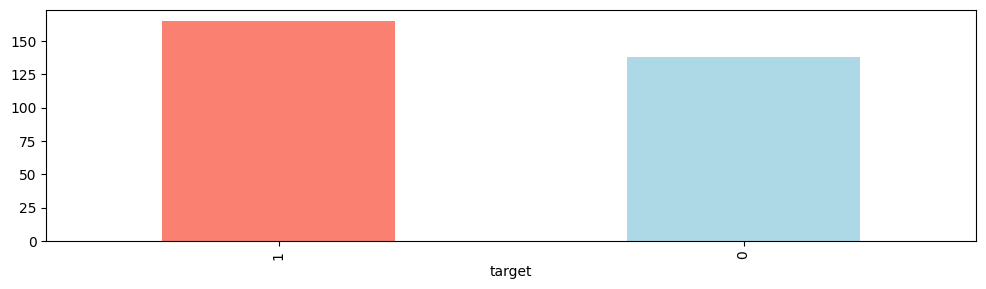

In [8]:
# Plotting
df["target"].value_counts().plot(kind='bar',color=['salmon','lightblue'],figsize=(12,3));

In [9]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# is there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Diease Frequency According to Sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


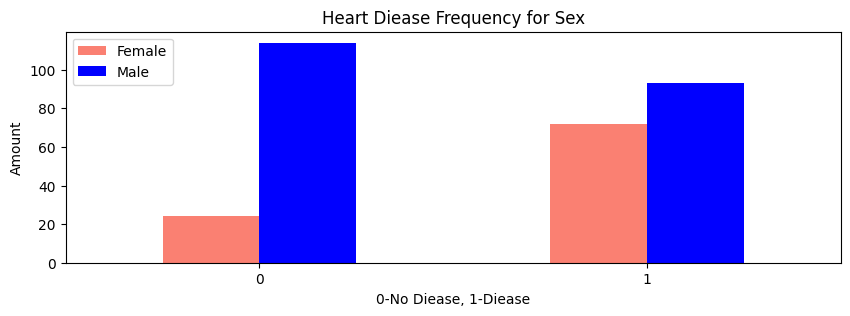

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,3),color=["Salmon","blue"])
plt.title("Heart Diease Frequency for Sex")
plt.xlabel("0-No Diease, 1-Diease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs. Max heart rate for heart Diease

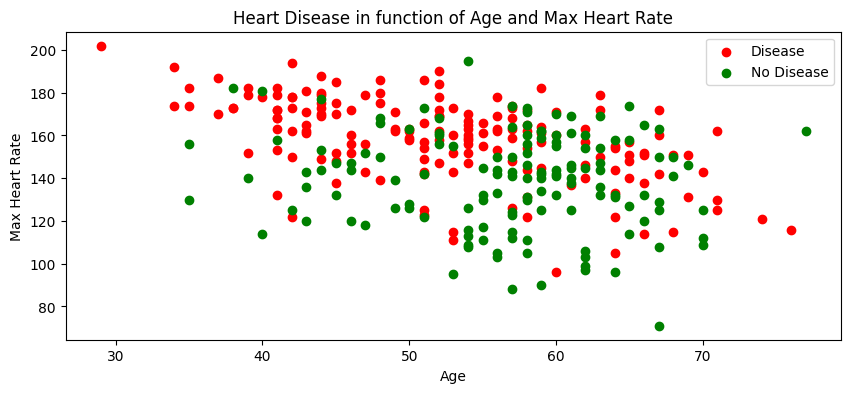

In [15]:
# Ceate another figure
plt.figure(figsize=(10,4))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

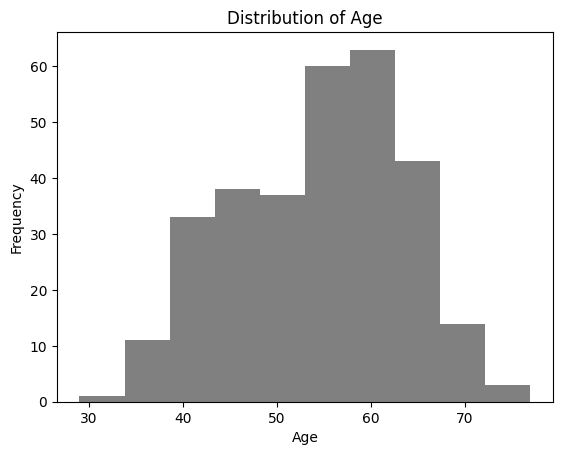

In [16]:
# check the distribution of age with histogram
plt.hist(df['age'],  color='grey')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Heart Diease Frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


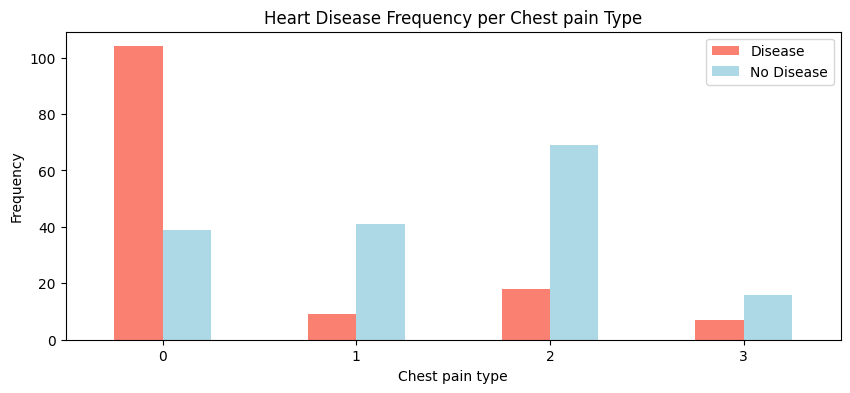

In [18]:
# Make the crosstab more visul
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,4),color=['salmon','lightblue'])
# Add more communication
plt.title("Heart Disease Frequency per Chest pain Type")
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['Disease','No Disease'])
plt.xticks(rotation=0);

In [19]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


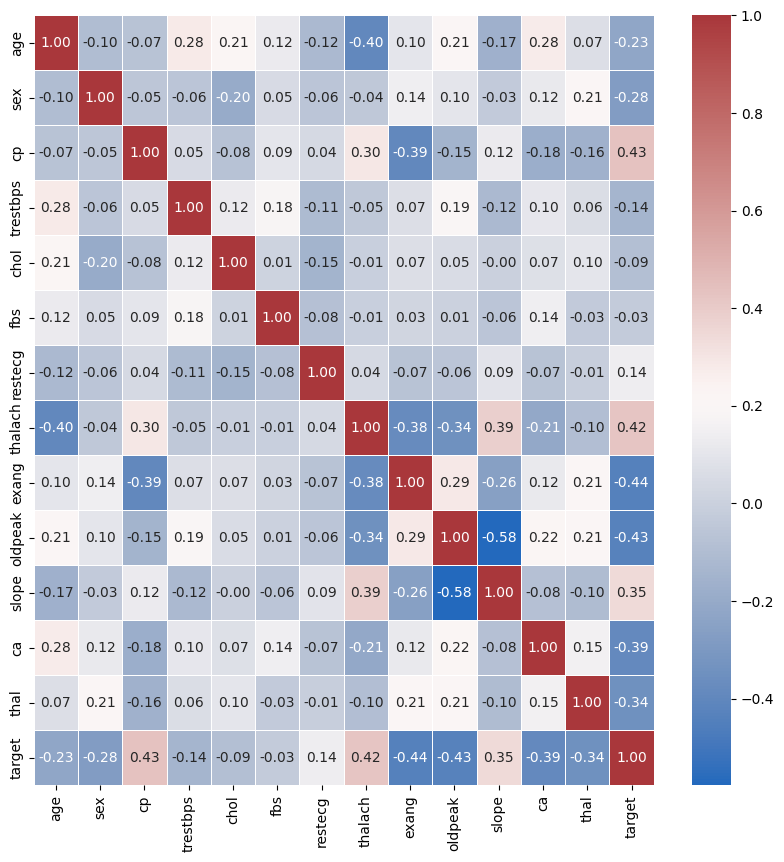

In [20]:
# Let's make our correlation matrix a little bit prettier
corr_mat= df.corr()
fig, ax = plt.subplots( figsize=(10,10))
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5,fmt="0.2f",cmap="vlag")

## 5. Modeling

In [21]:
# Split data into X and y
X=df.drop("target",axis=1)
y=df["target"]

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
# Split data into train and test 
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Now we get our train and test data, it's time to build the machine learning model

- We'll train it(Find the pattern) on the training data
- And we'll test it (Use the pattern) on the test data
- We'll going to try three different machine learning models
  1. Logistic Regression
  2. K-Nearest neighbor classifier
  3. Random classifier

In [24]:
# Let's put our models into a dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Random Classifier": RandomForestClassifier()}

# Create a faction to fit and test the model
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """Fits and evaluate the given machine learning model

    Args:
        models (_type_): _A dict of different scikit_learning model_
        X_train (_type_): _Training data with no labels_
        X_test (_type_): _Testing data with no labels_
        y_train (_type_): _Training data with labels_
        y_test (_type_): _Testing data with labels_
    """
    # Set a random seed
    np.random.seed(42)
    
    # Make a dict to keep the model score
    models_score = {}
    # Loop through Models
    for name, model in models.items():
        # Fit thw model to the data
        model.fit (X_train,y_train)
        # Evaluate the model and append its score to model score
        models_score[name] = model.score(X_test,y_test)
    return (models_score)
        

In [25]:
models_score = fit_and_score (models= models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

models_score

c:\Users\Naeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8360655737704918}

### Compering the model scores

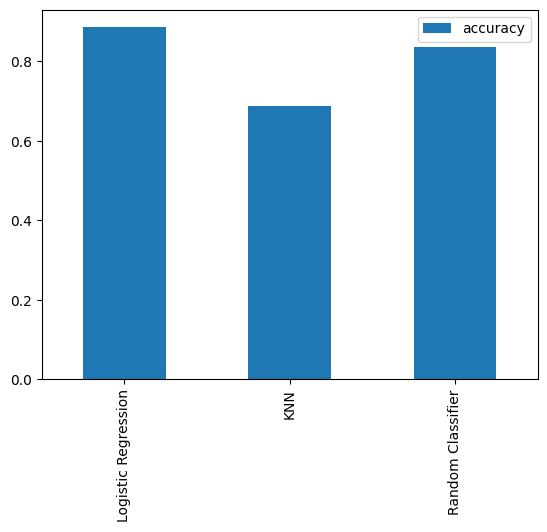

In [26]:
model_compare = pd.DataFrame(models_score, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a base line model.... and we know a model's first prediction are'nt always what we should our next steps off... what should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precsion
* f1 score
* Classificatoin report 
* ROC Curve
* Area Under the Curve (AUC)
  
## Hyperparameter tuning (By Hand)

In [27]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different knn neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))

In [28]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score of test data: 75.41%


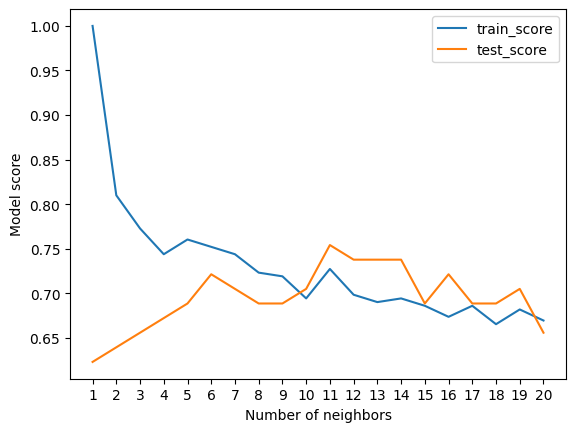

In [30]:
plt.plot(neighbors,train_score,label="train_score")
plt.plot(neighbors,test_score,label="test_score")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score of test data: {max(test_score)*100:.2f}%")

## Hyperparameter tuning with RendomizesearchCV

we're going to tune:
* Logistic regression
* Randomforestclassifier

... using RandomizedsearchCV

In [31]:
# Let's create a grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),"solver": ["liblinear"]}

# Let's create a grid for RandomForestClassifier
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 3,5, 10],
    'min_samples_split': [2,20, 2],
    'min_samples_leaf': [1, 2]
}

Now we've got hyperparameter grid setup for each model. Let's tune them with RandomizedserachCV

In [32]:
# Tune Logistic Regression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for logistic regression

rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_ 

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned Logistic regression. Let's do the same thing for Random Forest  classifier

In [35]:
# Setup random seed for reproducibility
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random Hyperparameter search model for random forest
rs_rf.fit(X_train, y_train)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Naeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Naeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Naeem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 20, 2],
                                        'n_estimators': [100, 200, 300]},
                   verbose=True)

In [36]:
# Get the best parameters from the random search
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 3}

In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Since our Logistic Regression model provide the best score so far, we'll try and improve them again using GridSearchCV

In [38]:
# Different hyperparameter for our Logistic Regression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"],
                }

# setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True)

# Fit our gridsearch model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
# check the best parameter
gs_log_reg.best_params_ 

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# Evaluate the grid search Logistic Regression
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [41]:
models_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8360655737704918}

## Evaluate our tuned machine learning classifirer, beyond accuracy

* Roc curve and AUC score
* confusion metrix
* classfication report
* presion 
* f1 score

... and it would be great if cross-validation where possible

to make compersion and evalute our tuned model, first we need to make predictions

In [42]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [51]:
from sklearn.metrics import RocCurveDisplay

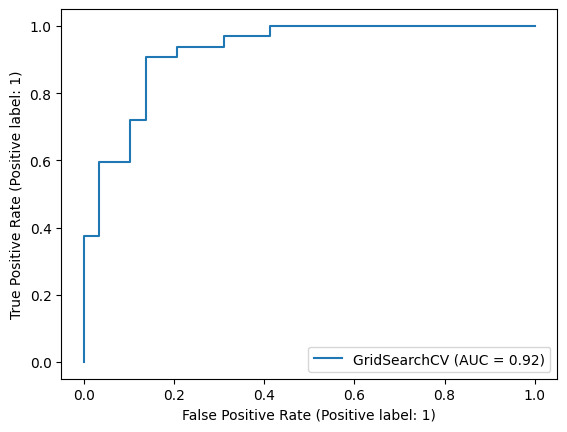

In [53]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test,y_test)

In [ ]:
# confusion matrix
print (confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


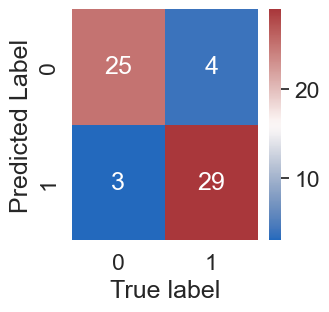

In [ ]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heaatmap
    
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,cmap = "vlag"
                    )
    plt.xlabel("True label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test, y_preds)

Now we've got a ROC Curve, an AUC metric and a confusion matrix. Let's get the classification report as well as cross-validation precsion, recall and f1 score

In [ ]:
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using the crosss-validation 

we're going to calculate precison, recall and f1 scores of our moedel using cross-validation and to do so we'll be using cross-val-score

In [54]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [56]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc.mean()  # Mean of the fold accuracies (CV)

# Confusion matrix for each fold and mean over all folds

0.8479781420765027

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision.mean()  # Mean of the fold precisions (CV)

0.8215873015873015

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall.mean()  # Mean of the fold recalls (CV)

0.9272727272727274

In [59]:
# Create Cross-valedated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1.mean()  # Mean of the fold f1-scores (CV)

0.8705403543192143

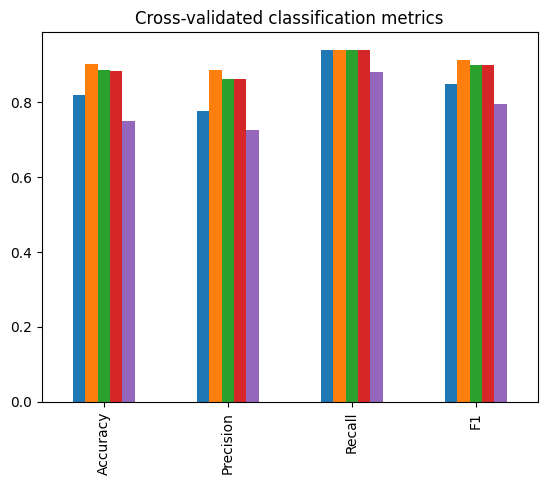

In [65]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                        "Precision": cv_precision,
                        "Recall": cv_recall,
                        "F1": cv_f1})
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                    legend=False);

### Feature Importance

 Which feature contributed most to the outcomes of the model and how did they contributes?

Finding feature importance is different for each machine learning model. one way of feature importance is to search for (MODEL NAME) feature importance

Let's find feature importance for our Logistiregression

In [66]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);

In [67]:
# Check coef 
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [69]:
# Match coefficients of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict 

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature Importance '}>

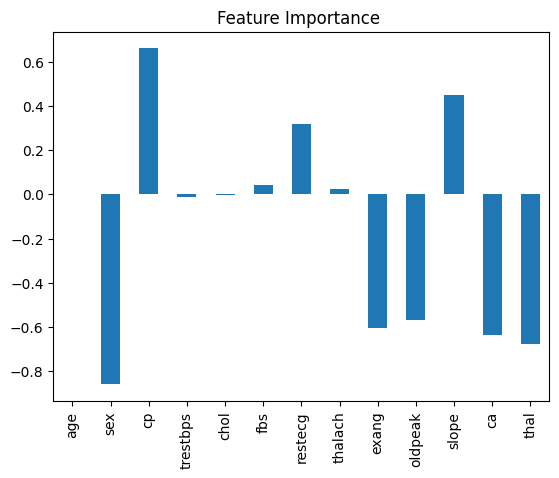

In [72]:
# Visulize feature importance
feature__df = pd.DataFrame(feature_dict,index=[0])
feature__df.T.plot.bar(title="Feature Importance ", legend=False)